# Graph Embedding

주요 목적
 - 1. 노드 간의 관계 유지 : 그래프 구조를 반영하여 유사한 노드들이 벡터 공간에서도 가까운 위치를 갖도록 함.
 - 2. 이웃 정보의 반영 : 노드가 속한 지역적 구조(이웃 관계)를 벡터 표현에 포함시켜, 그래프의 중요한 패턴을 보존
 - 3. 전역 구조 표현 : 노드뿐만 아니라 전체 그래프의 패턴을 학습하여, 그래프 수준의 분석이 가능하도록 함.

## embedding 전통적 방법
### 1. 행렬 분해 기반 기법(Matrix Factorization-based Methods)
 - 그래프이 인접 행렬 또는 유사도 행렬을 활용하여 노드 간의 관계를 vector로 표현하는 방식
 - 그래프를 행렬 형태로 변환한 후, 특정 행렬 분해 기법을 적용하여 노드 임베딩을 생성
##### 행렬 분해 기법
 - 라플라시안 아이겐맵 (Laplacian Eigenmaps) : 그래프의 라플라시안 행렬을 고유값 분해하여 그래프의 구조를 저차원 공간에 투영하는 방식, 가까운 노드가 벡터 공간에서도 가깝게 배치될 수 있음
 - HOPE (High-Order Proximity Embedding) : 그래프에서 고차원 근접성을 유지하면서 노드 임베딩을 생성하는 방법, Katz Index와 같은 유사도 척도를 사용하여 그래프를 행렬 형태로 표현한 후 행렬 분해

==> 행렬 분해 기반 방법은 이론적으로 안정적인 결과를 제공, 하지만 계산량이 많고 대규모 그래프에서 확장성이 떨어짐

### 2. 랜덤 워크 기반 기법(Random Walk-based Methods)
 - 그래프에서 노드 간의 관계를 탐색하기 위해 확률적 경로(Random Walk)를 활용하는 방식
 - 그래프 내에서 랜덤하게 노드를 이동하면서, 특정 패턴을 학습하여 임베딩 생성
 - Word2Vec과 같은 자연어 처리 기법과 유사하게 동작
 - 대표적으로 DeepWalk와 Node2Vec이 있음
 - 행렬 분해 방식보다 계산 효율성이 높고, 비교적 대규모 그래프에도 적용 가능

### 3. 전통적 그래프 임베딩 방법의 한계점
 1. 대규모 그래프에 대한 확정성 부족 : 행렬 기반은 계산량이 높고, 랜덤 워크 기반도 충분한 학습 데이터를 생성하는 데 시간이 오래 걸릴 수 있음
 2. 노드의 속성 정보를 직접 반영하기 어려움 : 기본적으로 구조적 정보에 의존하기 때문에, 노드 자체가 가진 feature를 학습하는 데 한계가 있음
 3. 동적 그래프를 처리하기 어려움 : 정적인 그래프에서 효과적이지만 시간이 지남에 따라 변하는 그래프 구조를 반영하는 데 추가적인 모델링이 필요함

==> 이러한 한계를 극복하기 위해, GNN과 같은 딥러닝 기반 방법들이 등장.

## DeepWalk
 - 노드 간의 관계를 벡터 공간으로 변환하는 그래프 임베딩 기법
 - 그래프에서 무작위 경로를 생성한 후, 해당 경로를 단어 시퀀스처럼 간주하여 학습하는 방식
 - 이를 통해, 유사한 구조를 가진 노드들이 벡터 공간에서도 가까운 위치를 갖도록 표현

### 핵심 개념
 - 자연어 처리에서 사용되는 단어 임베딩 기법과 유사하게 작동
 - 노드를 단어로, 생성된 random walk를 문장으로 간주하여 Word2Vec과 같은 모데을 활용해 노드 임베딩을 학습
 - 이렇게 학습된 노드 임베딩을 활용하면 그래프 데이터에서 노드 분류, 링크 예측, 추천 시스템 등 다양한 문제 해결 가능

 ### 동작 원리
  1. Random Walk 생성
   - G = (V,E) 에서 각 노드를 시작점으로 설정하고, 일정한 길이를 가진 random walk를 여러 번 수행
   - 이 과정에서 무작위로 연결된 이웃 노드를 따라 이동, 이 경로 저장
  2. Word2Vec을 이용한 임베딩 학습
   - random walk를 통해 생성된 노드 시퀀스는 Word2Vec의 입력 데이터로 활용됨
   - Word2VecDML Skip-Gram model을 적용하여, 특정 노드를 중심 단어로 두고 주변 노드를 예측하도록 학습
  3. 노드 임베딩 생성
   - 학습이 완료되면, 각 노드의 고정된 차원의 벡터로 변환.
   - 이 벡터는 노드의 관계 정보를 유지하면서도 머신러닝 모델에서 활용할 수 있는 형태로 표현됨

### 특징
  1. 지역적 구조(local structure) 효과적으로 학습
   - 가까운 노드들이 동일한 랜덤 워크 내에서 자주 등장하게 되므로, 임베딩 공간에서도 인접 노드들이 가깝게 배치되는 특성을 지님.
  2. 확장성 높음
   - 단순한 랜덤워크와 Word2Vec을 이용하기 때문에, 비교적 계산 비용이 낮고 대규모 모델에도 적용 가능
  3. 비지도 학습 방식
   - 그래프 구조만을 활용하여 노드 임베딩을 학습하며, 별도의 label이 필요 X
  4. Word2Vec 기반 학습 방식
   - Word2Vec의 Skip-Gram model을 활용하여 노드 임베딩을 학습하는데, 이는 단어의 문맥을 학습하는 방식과 유사
   - 따라서, 그래프에서 의미적으로 유사한 노드들이 동일한 컨텍스트 내에서 학습되며, 임베딩 벡터가 노드 간의 관계를 반영할 수 있음.

## Node2Vec
 - DeepWalk를 개선한 그래프 임베딩 기법
 - 노드 간의 관계를 학습하여 벡터로 변환
 - random walk를 생성하여 random walk의 탐색 전략을 조정할 수 있는 parameters를 도입하여, 노드의 구저적 특성을 정교하게 학습할 수 있음

### 핵심 개념
 - Random Walk를 단순한 균등 분포가 아닌, 깊이 우선 탐색(DFS)와 너비 우선 탐색(BFS)의 균형을 조절할 수 있도록 함
 - 이를 통해, 노드의 지역적 및 전역적 관계를 효과적으로 학습하며, 다양한 그래프 구조에서 유연하게 작동 가능

### 동작 원리
 1. 유연한 랜덤 워크 생성
  - 두 paramaters p와 q를 도입하여, 탐색 방식이 단순한 랜덤 워크가 아닌, 특정 전략을 따르도록 설계
  - p : 이전 노드로 되돌아가는 확률
  - p가 크면, 이전 노드로 돌아갈 확률이 낮아져, 노드가 새로운 방향으로 탐색하는 가능성이 높이지고, p가 작으면, 이전 노드로 돌아갈 확률이 높아져 제한적인 경로를 따르게 됨
  - q : 깊이 우선 탐색(DFS)과 너비 우선 탐색(BFS) 간의 균형을 조절
  - q가 크면, BFS 방식이 강화되어, 시작 노드의 이웃 노드를 중심으로 탐색
  - q가 작으면, DFS 방식이 강화되어, 특정 경로를 따라 더 멀리 이동하는 방식으로 탐색
==> 이러한 방식을 통해, 노드 간의 다양한 관계를 학습할 수 있어짐

 2. Word2Vec을 활용한 임베딩 학습
  - Skip-Gram 모델을 사용하여, 특정 노드를 중심 단어로 두고 주변 노드를 예측

### 특징
 1. 랜덤 워크의 탐색 전략을 조정할 수 있음
  - 두 parameters를 이용해 경로 탐색 전략을 조절할 수 있음.
  - 이를 통해, 지역적 정보뿐만 아니라, 전역적 구조도 효과적으로 학습 가능
 2. 지역적(local) 및 전역적(global) 구조 반영 가능
  - BFS 중심 탐색의 경우, 커뮤니티 내에서 밀접한 관계를 가지는 노드들의 유사성을 강조할 수 있으며,
  - DFS 중심 탐색의 경우, 그래프의 전역적 구조를 반영하여 멀리 떠러진 노드 간의 관계를 학습할 수 있음.
 3. 비지도 학습 방식
 4. Word2Vec을 활용한 학습 방식
 5. 그래프 크기에 따라 효율적 확장 가능성

### Graph Embedding practice

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [2]:
# Create Sample Graph

def create_sample_graph():
    G = nx.karate_club_graph()
    return G

# Correctness 확인
G = create_sample_graph()
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
assert G.number_of_nodes() == 34, "Karate club graph should have 34 nodes"
# assert는 조건이 참인지 확인하는 구문
# 형태 ==> assert 조건식, "에러 메시지"
# if 조건식이 False 이면, 에러 메시지가 출력됨

Number of nodes: 34
Number of edges: 78


In [3]:
# DeepWalk Implementation

def random_walk(G, start_node, length):
    walk = [start_node]
    for _ in range(length):
        curr = walk[-1]
        neighbors = list(G.neighbors(curr))
        if neighbors:
            walk.append(random.choice(neighbors))
    return [str(node) for node in walk]

def deep_walk(G, walk_length, num_walks, dimensions):
    walks = []
    nodes = list(G.nodes())
    
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = random_walk(G, node, walk_length)
            walks.append(walk)
            
        model = Word2Vec(walks, vector_size=dimensions, window=5, min_count=0, sg=1, workers=4)
        return model
    
# Correctness 확인
test_walk = random_walk(G, 0, 5)
print(f"Sample random walk: {test_walk}")

Sample random walk: ['0', '31', '28', '33', '22', '33']


In [4]:
# Node2Vec implementation

def biased_random_walk(G, start_node, length, p, q):
    walk = [start_node]
    for _ in range(length):
        curr = walk[-1]
        prev = walk[-2] if len(walk) > 1 else None
        neighbors = list(G.neighbors(curr))
        if not neighbors:
            break
        
        if prev is None:
            walk.append(random.choice(neighbors))
        else:
            next_node = sample_next_node(G, curr, prev, neighbors, p, q)
            walk.append(next_node)
    return [str(node) for node in walk]

def sample_next_node(G, curr, prev, neighbors, p, q):
    return random.choice(neighbors)

def node2vec(G, walk_length, num_walks, dimensions, p, q):
    walks = []
    nodes = list(G.nodes())
    
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = biased_random_walk(G, node, walk_length, p, q)
            walks.append(walk)
            
    model = Word2Vec(walks, vector_size=dimensions, window=5, min_count=0, sg=1, workers=4)
    return model

# Correctness 확인
test_biased_walk = biased_random_walk(G, 0, 5, 1, 1)
print(f"Sample biased random walk: {test_biased_walk}")

Sample biased random walk: ['0', '10', '4', '10', '0', '12']


In [7]:
# Visualization Functions
# 그래프 임베딩 시각화 함수

def plot_embeddings(model, G, algorithm_name):
    # Node embeddings
    node_embeddings = np.zeros((len(G.nodes()), model.vector_size))
    for i, node in enumerate(G.nodes()):
        node_embeddings[i] = model.wv[str(node)]
        
    # 시각화를 위한 차원축소로 TSNE 사용
    tsne = TSNE(n_components=2, random_state=42)
    node_embeddings_2d = tsne.fit_transform(node_embeddings)
    
    # Plot
    plt.figure(figsize=(10,8))
    plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1])
    
    # Node labels 추가
    for i, node in enumerate(G.nodes()):
        plt.annotate(node, (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]))
        
    plt.title(f"{algorithm_name} Node Embeddings Visualization")
    plt.show()

Runnning DeepWalk...


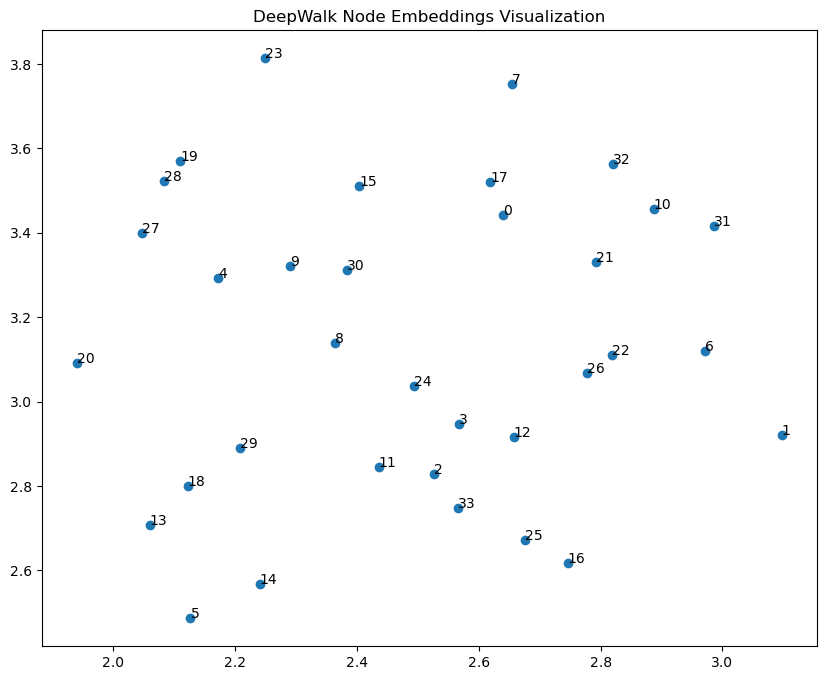

Running Node2Vec...


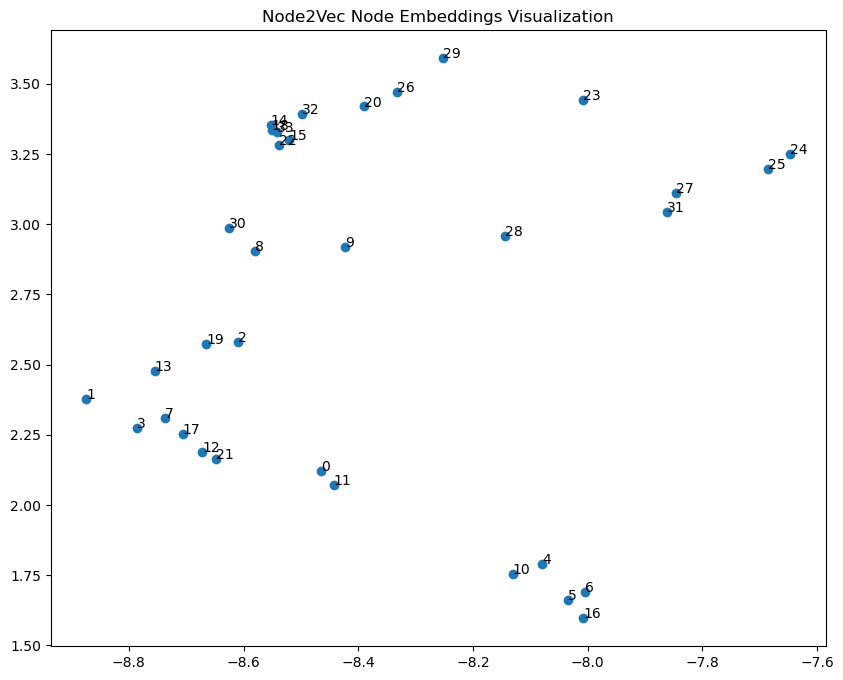

In [14]:
# Run Experiments

# Parameters
WALK_LENGTH = 10
NUM_MALKS = 80
DIMENSIONS = 128
P = 1
Q = 1

# DeepWalk 실행
print("Runnning DeepWalk...")
deepwalk_model = deep_walk(G, WALK_LENGTH, NUM_MALKS, DIMENSIONS)
plot_embeddings(deepwalk_model, G, "DeepWalk")

# embedding dimensions 임베딩 차원 확인
assert deepwalk_model.vector_size == DIMENSIONS, "Embedding dimension don't match"

# Nod2Vec 실행
print("Running Node2Vec...")
node2vec_model = node2vec(G, WALK_LENGTH, NUM_MALKS, DIMENSIONS, P, Q)
plot_embeddings(node2vec_model, G, "Node2Vec")

# embedding dimensions 임베딩 차원 확인
assert node2vec_model.vector_size == DIMENSIONS, "Embedding dimentions don't match"

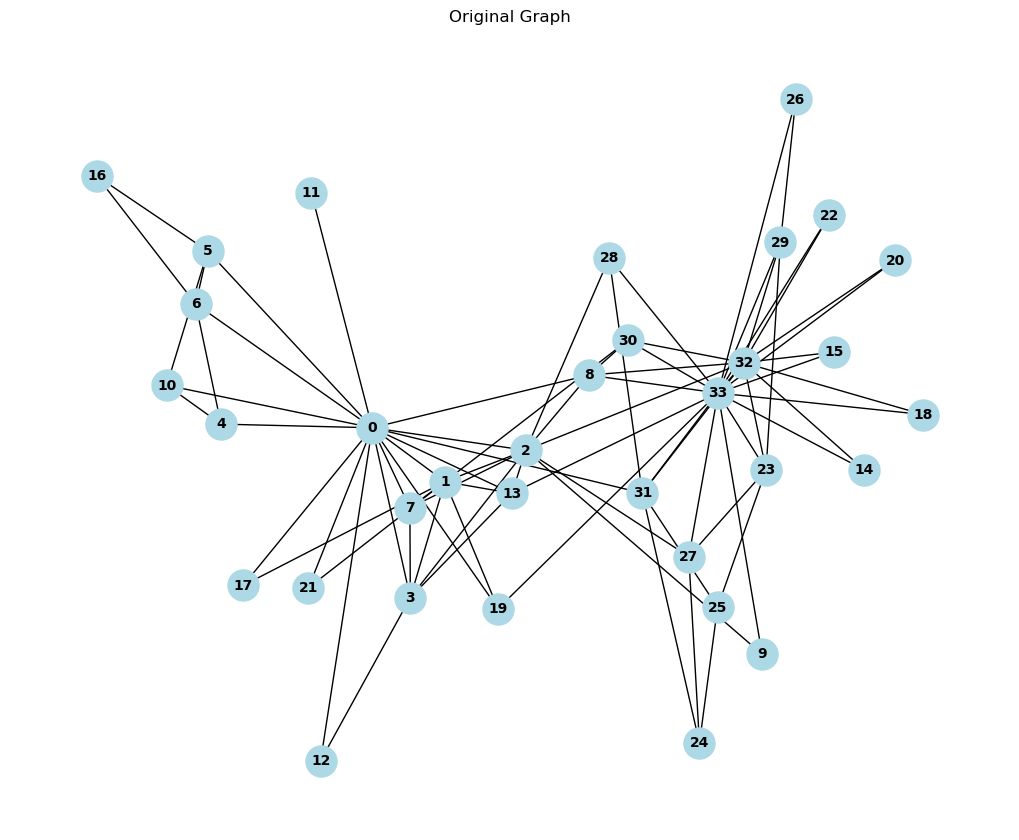

In [15]:
# Visualize Original Graph

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True,
        node_color="lightblue",
        node_size=500,
        font_size=10,
        font_weight="bold")
plt.title("Original Graph")
plt.show()

### Node2Vec : torch_geometric 실습
이 내용은 4장에서 자세히 다룰 예정. 가볍게 보기

In [2]:
# pip3 install torch torchvision
import torch
torch.__version__

'2.4.1'

In [1]:
import torch

print(torch.backends.mps.is_available())   # True면 MPS 사용 가능
print(torch.backends.mps.is_built())       # PyTorch가 MPS 빌드 포함했는지


True
True


In [23]:
# pip install list
# torch \ torch-geometric \ torch-sparse \ torch-scatter \ torch-cluster \ pyg-lib \ -f https//:data.pyg.org/whl/torch-{torch.__version__}.html

# scatter는 mac에서 gpu를 지원하지 않음. 아마 다른 패키지도 지원 안 할 가능성이 높임 (https://pypi.org/project/torch-scatter/)

# torch-geometric ==> pip install torch_geometric
# torch-sparse ==> conda install pytorch-sparse -c pyg or pip install torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+${CUDA}.html
# torch-scatter ==> conda install pytorch-scatter -c pyg or pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+${CUDA}.html
# ctorch-cluster ==> conda install pytorch-cluster -c pyg or pip install torch-cluster -f https://data.pyg.org/whl/torch-2.1.0+${CUDA}.html
# pyg-lib ==> pip install pyg-lib -f https://data.pyg.org/whl/torch-{torch.__version__}+{CUDA}.html
#             torch.__version__ : 2.4.1, CUDA : cpu
#             따라서, pip install pyg-lib -f https://data.pyg.org/whl/torch-2.4.1+cpu.html
 
# torch, torch-geometric, torch-sparse, ... ==> conda, pip 통일 안해주면 torch import 할 때 error 발생해

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import Node2Vec

import sys

In [4]:
# Cora dataset
# Cora dataset : 그래프 분석에서 기본적으로 사용하는 Cora 데이터셋을 불러오고 확인

dataset = Planetoid(root="dataset", name="Cora")
data = dataset[0]

# print information about the dataset
print(f"*Dataset : {dataset}")
print("-------------")
print(f"No. of graphs: {len(dataset)}")
print(f"No. of nodes: {data.x.shape[0]}")
print(f"No. of feature: {dataset.num_features}")
print(f"No. of classes: {dataset.num_classes}")

# print information about the graph
print(f"\n*Graph:")
print("-------------")
print(f"Edges directed: {data.is_directed()}")
print(f"Graph isolated nodes: {data.has_isolated_nodes()}")
print(f"Graph loops: {data.has_self_loops()}")

*Dataset : Cora()
-------------
No. of graphs: 1
No. of nodes: 2708
No. of feature: 1433
No. of classes: 7

*Graph:
-------------
Edges directed: False
Graph isolated nodes: False
Graph loops: False


In [5]:
# Node2Vec
# torch-geometric의 Node2Vec으로 그래프 임베딩 모델을 만듬

device = "mps" if torch.cuda.is_available() else "cpu"

model = Node2Vec(data.edge_index,
                 embedding_dim=128,
                 walk_length=20,
                 context_size=10,
                 walks_per_node=10,
                 num_negative_samples=1,
                 p=1.0,
                 q=1.0,
                 sparse=True,
).to(device)

In [7]:
# Model & Optimizer
# 모델 로드하고 Optimizer를 설정함

num_workers = 4 if sys.platform == 'linux' else 0
loader = model.loader(batch_size=128, shuffle=True, num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

Epoch: 010, Loss: 1.7225, Acc: 0.4130
Epoch: 020, Loss: 0.9667, Acc: 0.6240
Epoch: 030, Loss: 0.8691, Acc: 0.6740
Epoch: 040, Loss: 0.8436, Acc: 0.6910
Epoch: 050, Loss: 0.8338, Acc: 0.7080
Epoch: 060, Loss: 0.8285, Acc: 0.7190
Epoch: 070, Loss: 0.8259, Acc: 0.7130
Epoch: 080, Loss: 0.8247, Acc: 0.7210
Epoch: 090, Loss: 0.8244, Acc: 0.7110
Epoch: 100, Loss: 0.8238, Acc: 0.7120


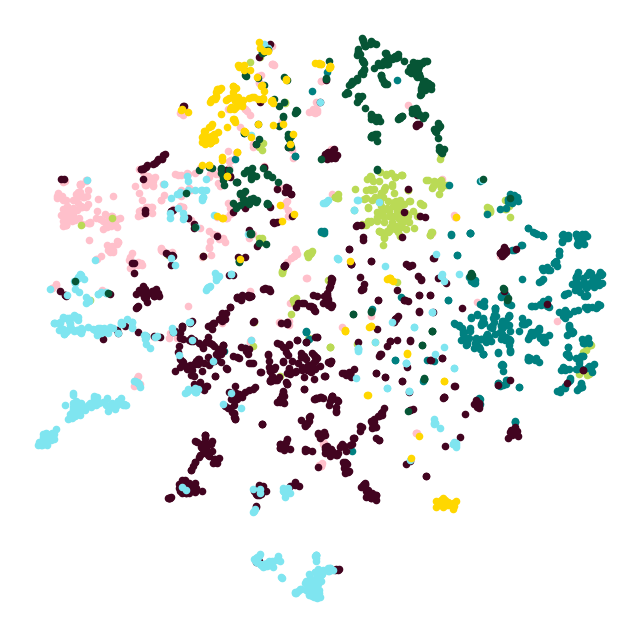

In [10]:
# Train & Test
# 학습과 테스트 검증을 동시에 실행하고 임베딩 결과를 시각화

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(train_z = z[data.train_mask],
                     train_y = data.y[data.train_mask],
                     test_z = z[data.test_mask],
                     test_y = data.y[data.test_mask],
                     max_iter=150,)
    return acc

for epoch in range(1, 101):
    loss = train()
    acc = test()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}")

@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model().cpu().numpy()
    z = TSNE(n_components=2).fit_transform(z)
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8,8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis("off")
    plt.show()

colors = ["#ffc0cb", "#bada55", "#008080", "#420420", "#7fe5f0", "#065535", "#ffd700"]
plot_points(colors)
